# Stereoseq (mouse kidney)

We analyzed the mouse kidney stereoseq dataset. This data can be obtained from stomics (https://db.cngb.org/stomics/datasets/STDS0000240/data).

## 1. Import packages

In [1]:
import DiffGSP as dg
import torch
import scanpy as sc
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

/home/sunshuli/anaconda3/envs/DiffGSP/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Read data

In [2]:
# Set parameters
data_path = f'/storage/sunshuli/datasets/Stereoseq/Mouse_Kidney'
data_name = 'mouse_kidney_A02497C1'
data_type = 'Stereoseq'
method = 'manual'
alpha = 0
k = 2
bin_size_calculate = 200
optimal_solution = [0.8, 0.5]

adata = sc.read_h5ad(f'{data_path}/h5ad/{data_name}_{bin_size_calculate}.h5ad')
adata.obs['in_tissue'] = 1

## 3. Data processing, including filtering genes and identifying svgs

In [3]:
adata = adata[:, dg.prefilter_genes(adata, min_cells=10, min_counts=100)]
svgs = dg.select_svgs(adata, svg_method='gft_top', n_top=2000)
adata = adata[:, svgs]

## 4. Run DiffGSP and downstream analysis (bin 200)

In [4]:
bin_size = 200

#%% Apply to high-resolution data
adata = sc.read_h5ad(f'{data_path}/h5ad/{data_name}_{bin_size}.h5ad')
adata.obs['in_tissue'] = 1
adata = adata[:, svgs]
adata = dg.fill_adata(adata, bin_size=bin_size)
adata_raw = adata.copy()

factor = bin_size / bin_size_calculate
part = int(bin_size_calculate / bin_size)
adata = dg.run_diffgsp_subgraph(adata, k=k, variable= [i * factor for i in optimal_solution], array_key=['x', 'y'],
                                partition=[part, part], data_type=data_type, bin_size=bin_size)

Test: 100%|███████████████████████████████████████████████| 1/1 [00:02<00:00,  2.30s/it, Finish=1/1]


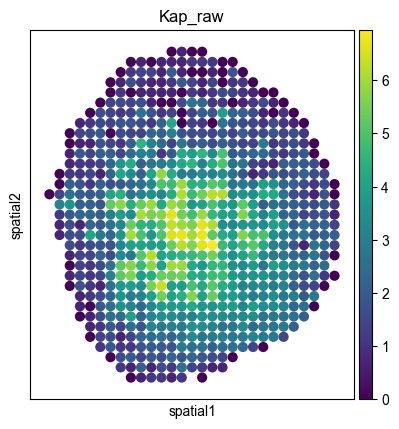

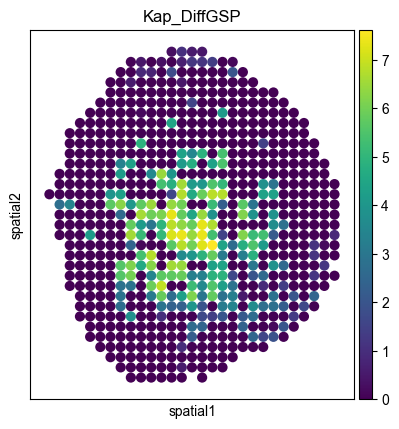

In [5]:
adata_raw = adata_raw[adata_raw.obs['in_tissue'] == 1, :]
adata = adata[adata.obs['in_tissue'] == 1, :]
sc.pp.log1p(adata_raw)
sc.pp.log1p(adata)

gene = 'Kap'
sc.pl.spatial(adata_raw, color=gene, spot_size=bin_size, title=f'{gene}_raw')
sc.pl.spatial(adata, color=gene, spot_size=bin_size, title=f'{gene}_DiffGSP')

## 5. Run DiffGSP and downstream analysis (bin 100)

In [6]:
bin_size = 100

#%% Apply to high-resolution data
adata = sc.read_h5ad(f'{data_path}/h5ad/{data_name}_{bin_size}.h5ad')
adata.obs['in_tissue'] = 1
adata = adata[:, svgs]
adata = dg.fill_adata(adata, bin_size=bin_size)
adata_raw = adata.copy()

factor = bin_size / bin_size_calculate
part = int(bin_size_calculate / bin_size)
adata = dg.run_diffgsp_subgraph(adata, k=k, variable= [i * factor for i in optimal_solution], array_key=['x', 'y'],
                                partition=[part, part], data_type=data_type, bin_size=bin_size)

Test: 100%|███████████████████████████████████████████████| 4/4 [00:05<00:00,  1.46s/it, Finish=4/4]


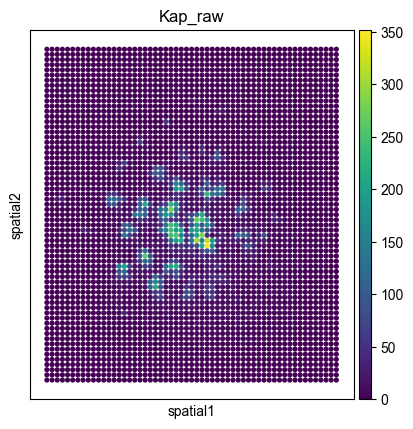

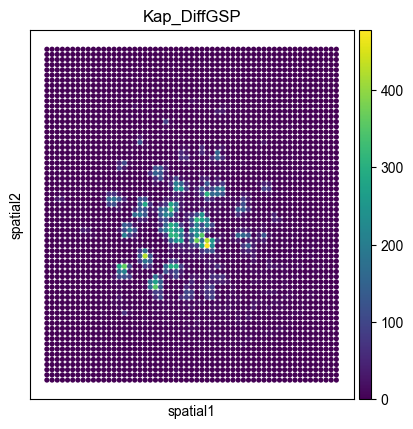

In [7]:
genei = 'Kap'
sc.pl.spatial(adata_raw, color=gene, spot_size=bin_size, title=f'{gene}_raw')
sc.pl.spatial(adata, color=gene, spot_size=bin_size, title=f'{gene}_DiffGSP')

## 6. Run DiffGSP and downstream analysis (bin 50)

In [8]:
bin_size = 50

#%% Apply to high-resolution data
adata = sc.read_h5ad(f'{data_path}/h5ad/{data_name}_{bin_size}.h5ad')
adata.obs['in_tissue'] = 1
adata = adata[:, svgs]
adata = dg.fill_adata(adata, bin_size=bin_size)
adata_raw = adata.copy()

factor = bin_size / bin_size_calculate
part = int(bin_size_calculate / bin_size)
adata = dg.run_diffgsp_subgraph(adata, k=k, variable= [i * factor for i in optimal_solution], array_key=['x', 'y'],
                                partition=[part, part], data_type=data_type, bin_size=bin_size)

Test: 100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.74it/s, Finish=16/16]


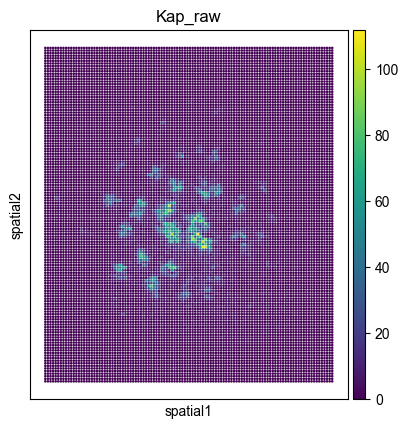

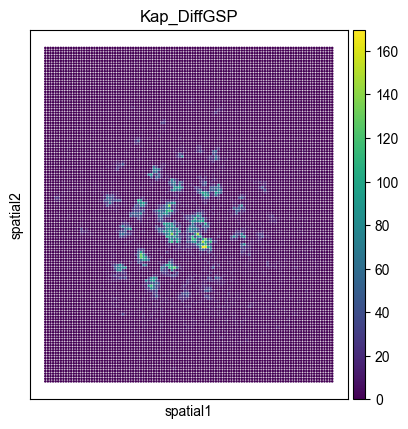

In [9]:
genei = 'Kap'
sc.pl.spatial(adata_raw, color=gene, spot_size=bin_size, title=f'{gene}_raw')
sc.pl.spatial(adata, color=gene, spot_size=bin_size, title=f'{gene}_DiffGSP')

## 7. Run DiffGSP and downstream analysis (bin 20)

In [10]:
bin_size = 20

#%% Apply to high-resolution data
adata = sc.read_h5ad(f'{data_path}/h5ad/{data_name}_{bin_size}.h5ad')
adata.obs['in_tissue'] = 1
adata = adata[:, svgs]
adata = dg.fill_adata(adata, bin_size=bin_size)
adata_raw = adata.copy()

factor = bin_size / bin_size_calculate
part = int(bin_size_calculate / bin_size)
adata = dg.run_diffgsp_subgraph(adata, k=k, variable= [i * factor for i in optimal_solution], array_key=['x', 'y'],
                                partition=[part, part], data_type=data_type, bin_size=bin_size)

Test: 100%|███████████████████████████████████████| 100/100 [00:38<00:00,  2.61it/s, Finish=100/100]


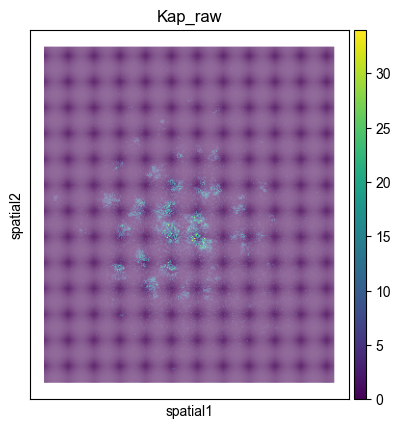

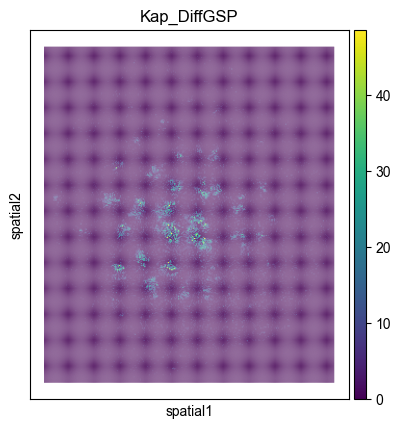

In [11]:
genei = 'Kap'
sc.pl.spatial(adata_raw, color=gene, spot_size=bin_size, title=f'{gene}_raw')
sc.pl.spatial(adata, color=gene, spot_size=bin_size, title=f'{gene}_DiffGSP')